# Model Evaluation and Hyperparameter Tuning

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Breast Cancer Wisconsin dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

## Data Pre-Processing

In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [5]:
le.transform(['M', 'B'])

array([1, 0])

## Combining transformers and estimators in a pipeline

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)
    
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.982


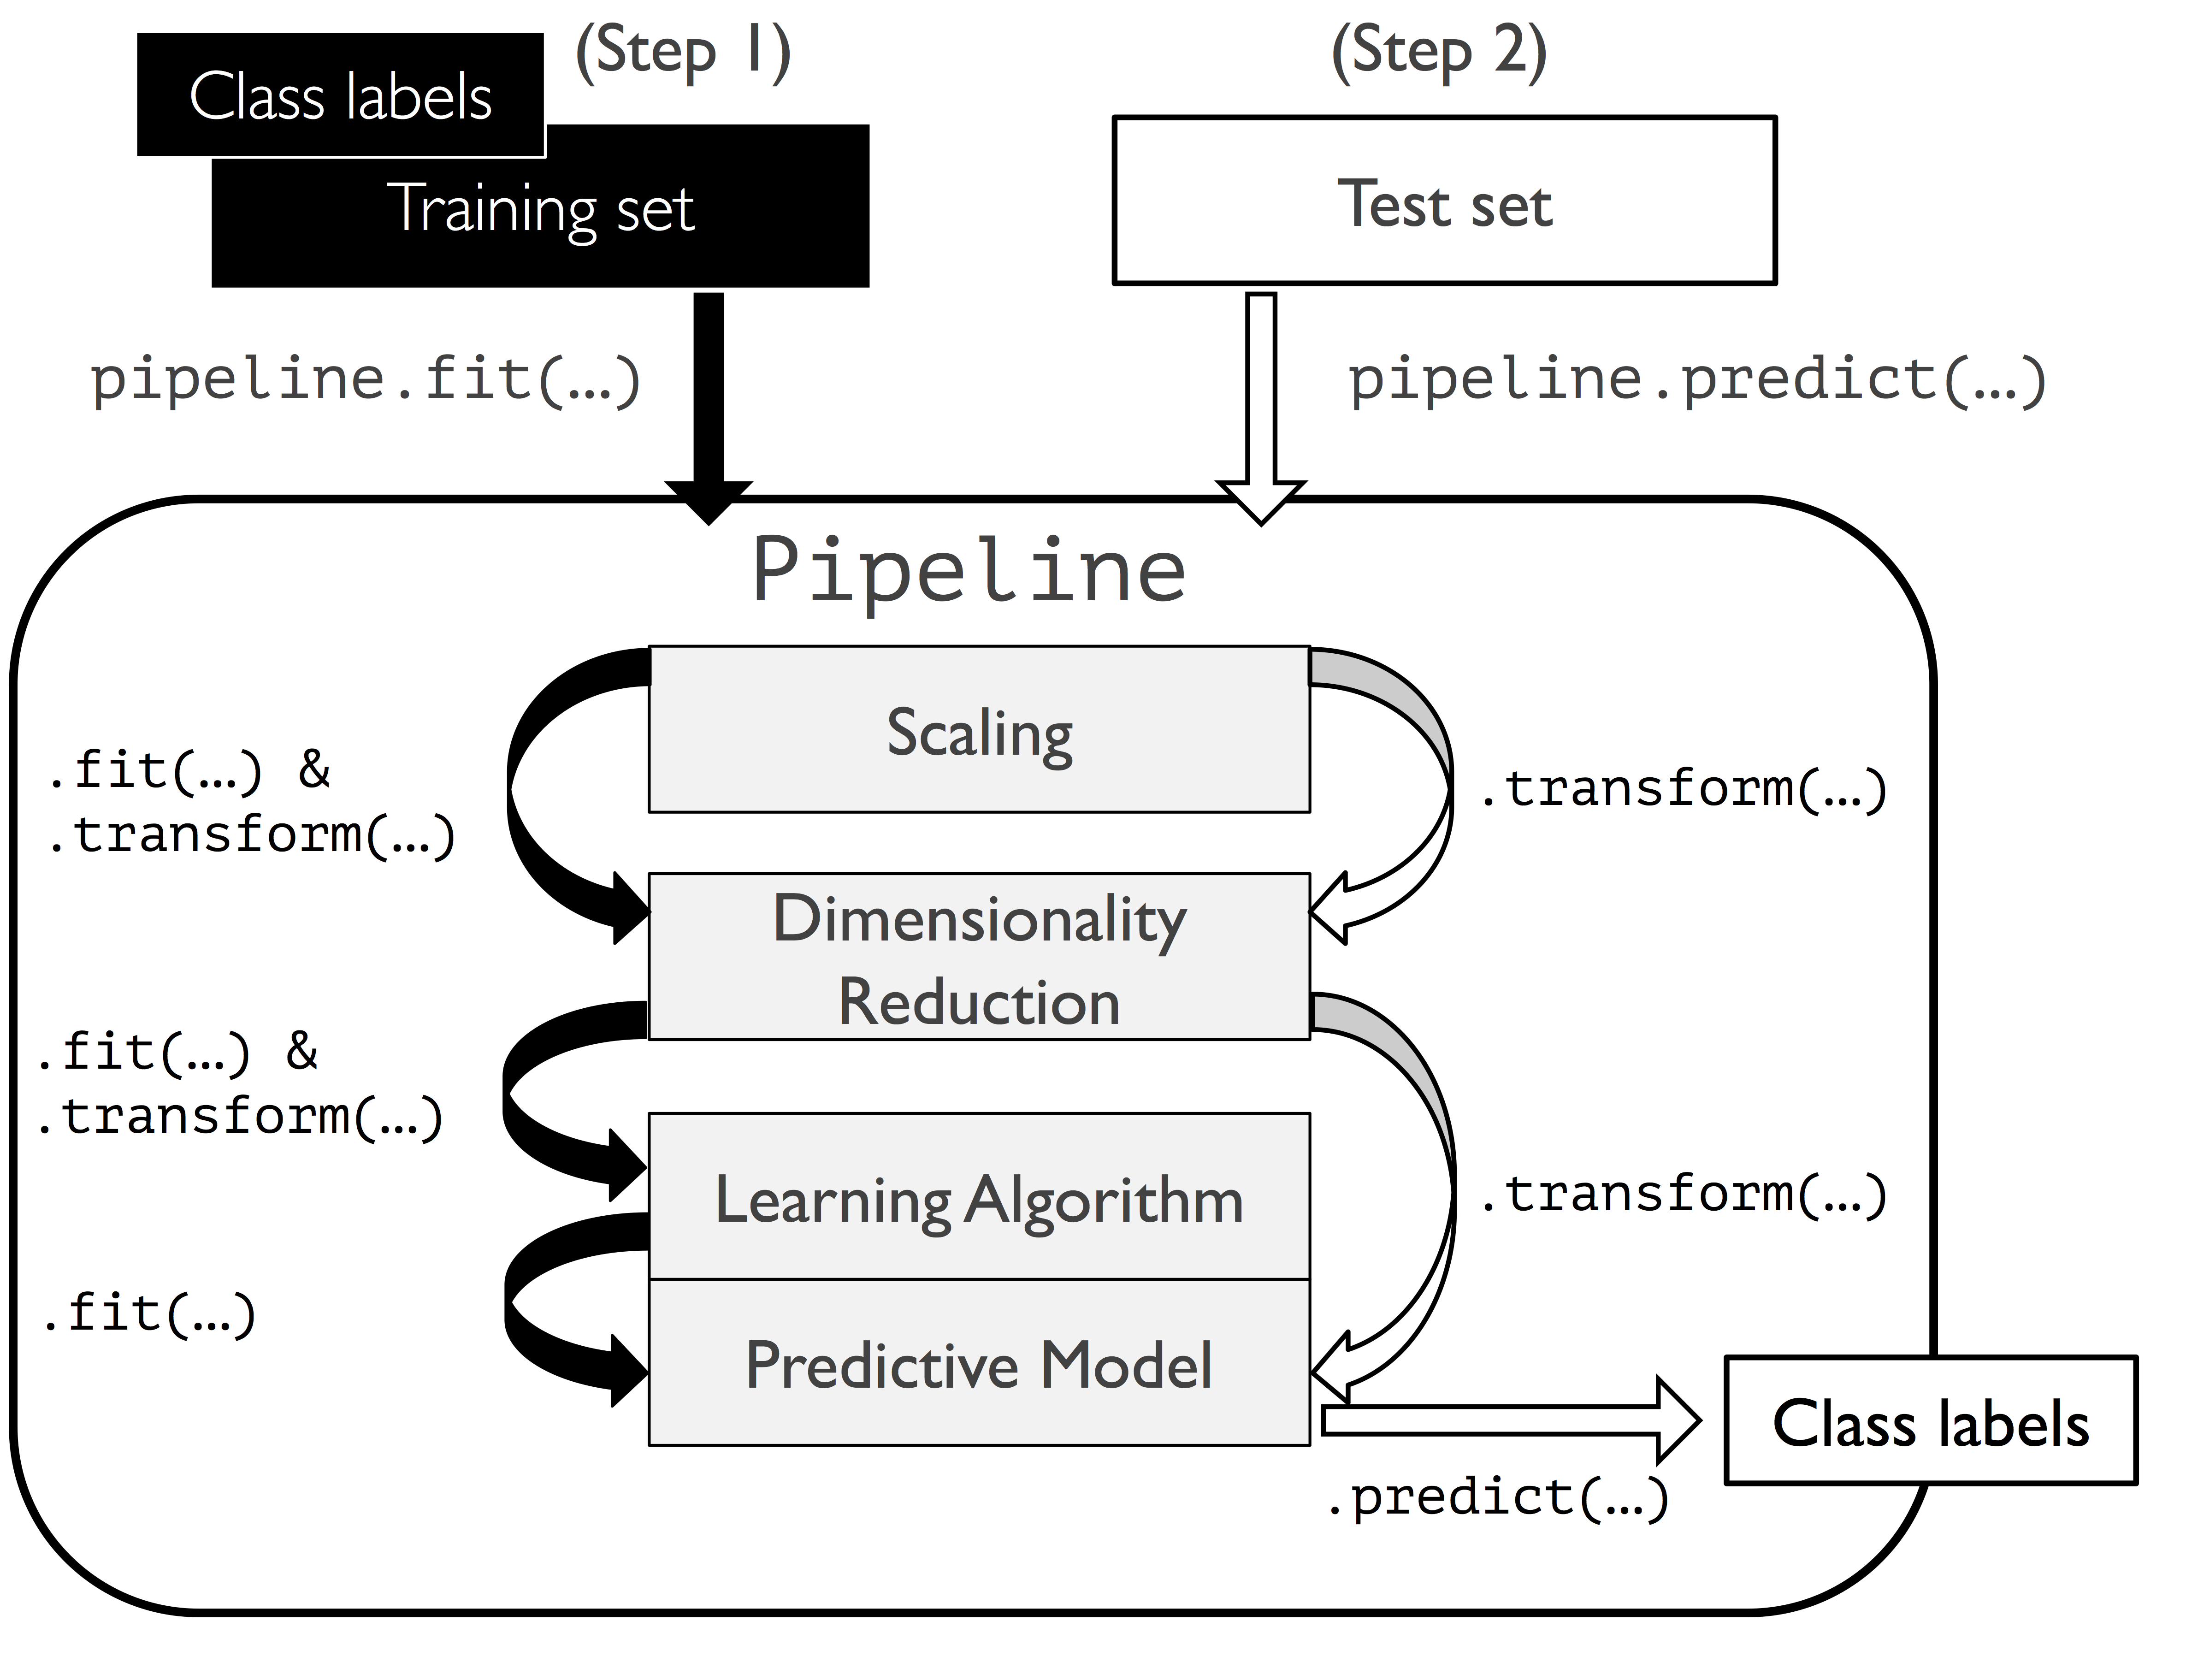

In [7]:
Image(filename='images/06_01.png', width=500) 

# Model Selection

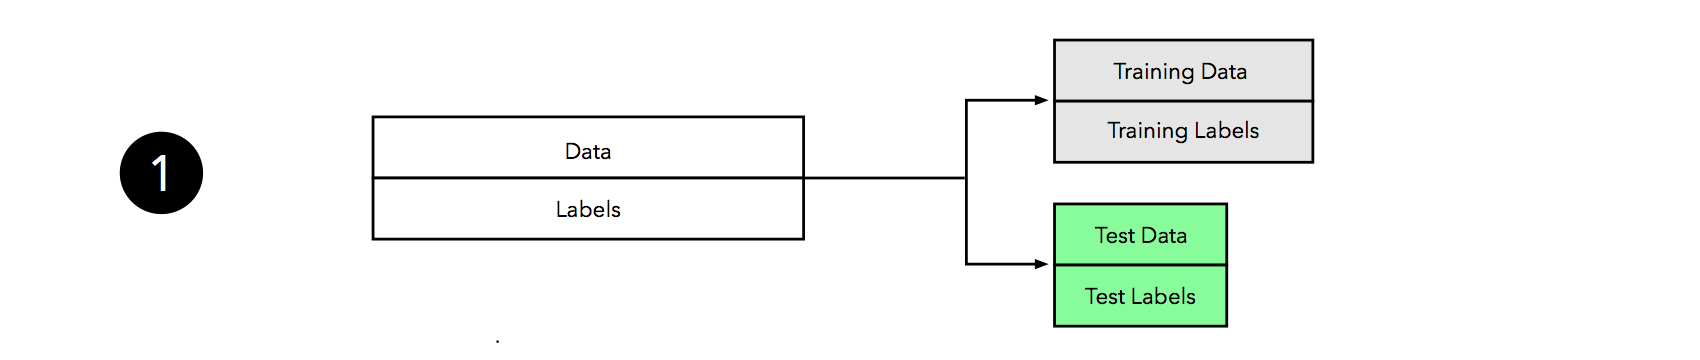

In [8]:
Image(filename='images/ms_1.png', width=1000) 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

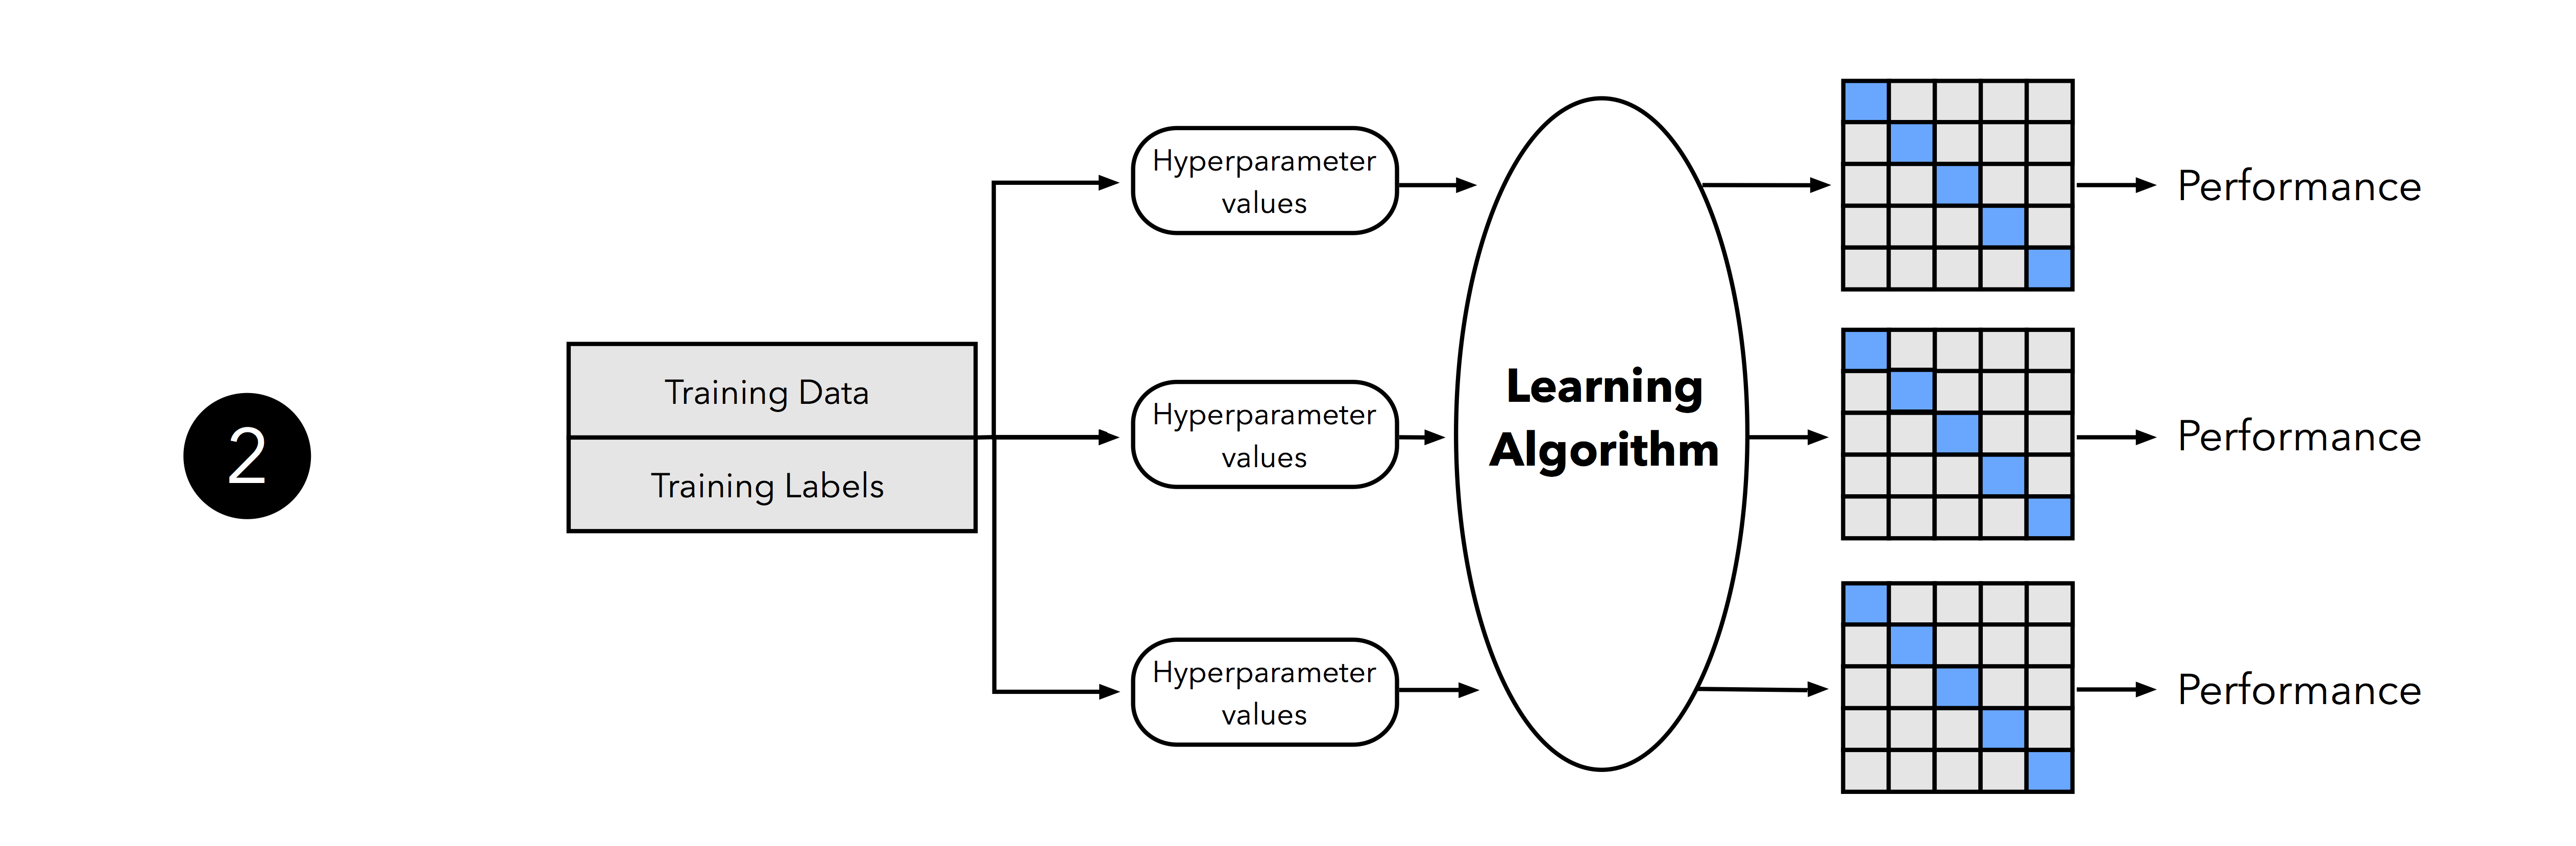

In [10]:
Image(filename='images/ms_2.png', width=1000) 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

param_grid_lr = [{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

gs_lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid_lr, 
                  scoring='accuracy', 
                  cv=10,
                  refit=True)

gs_lr = gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.best_params_)

pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid_dt = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
               'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}]

gs_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=param_grid_dt,
                  scoring='accuracy',
                  cv=10,
                  refit=True)

gs_dt = gs_dt.fit(X_train, y_train)

print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.98021978022
{'logisticregression__C': 0.1}
0.958241758242
{'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 4}


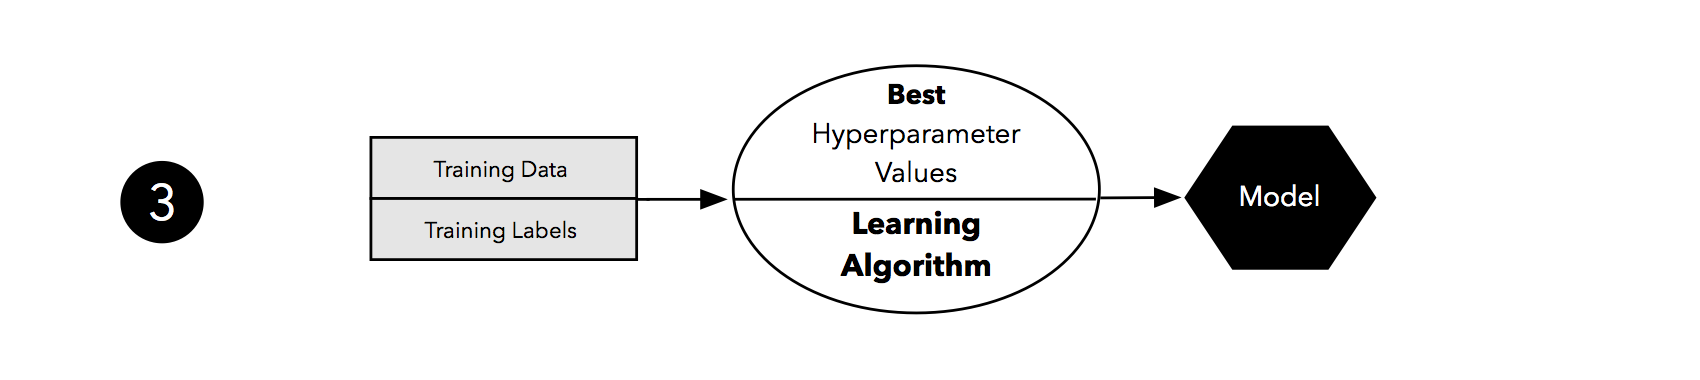

In [12]:
Image(filename='images/ms_3.png', width=1000)

In [13]:
#select best estimator for each algorithm
best_lr = gs_lr.best_estimator_
best_dt = gs_dt.best_estimator_

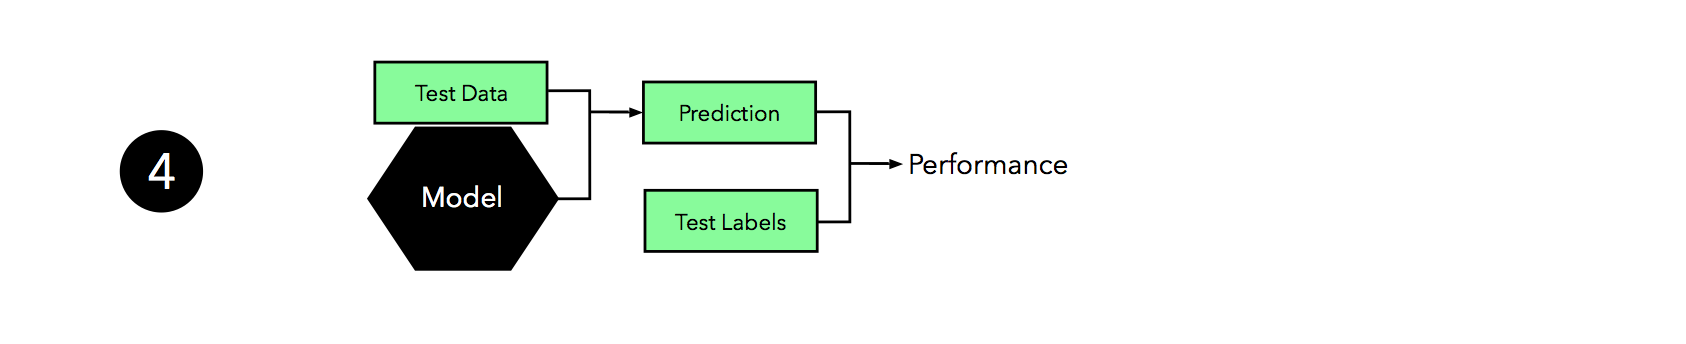

In [14]:
Image(filename='images/ms_4.png', width=1000) 

In [15]:
from sklearn.metrics import accuracy_score

y_pred_lr_test = best_lr.predict(X_test)
y_pred_dt_test = best_dt.predict(X_test)

y_pred_lr_train = best_lr.predict(X_train)
y_pred_dt_train = best_dt.predict(X_train)

print("Training Error")
print('Logistic Regression Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_lr_train))
print('Decision Tree Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_dt_train))
print("---------------")
print("Testing Error")
print('Logistic Regression Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Decision Tree Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_dt_test))

Training Error
Logistic Regression Train Accuracy: 0.987
Decision Tree Train Accuracy: 0.985
---------------
Testing Error
Logistic Regression Test Accuracy: 0.982
Decision Tree Test Accuracy: 0.939


# Logistic Regression is a winner!

## Looking at different performance evaluation metrics

## Reading a confusion matrix

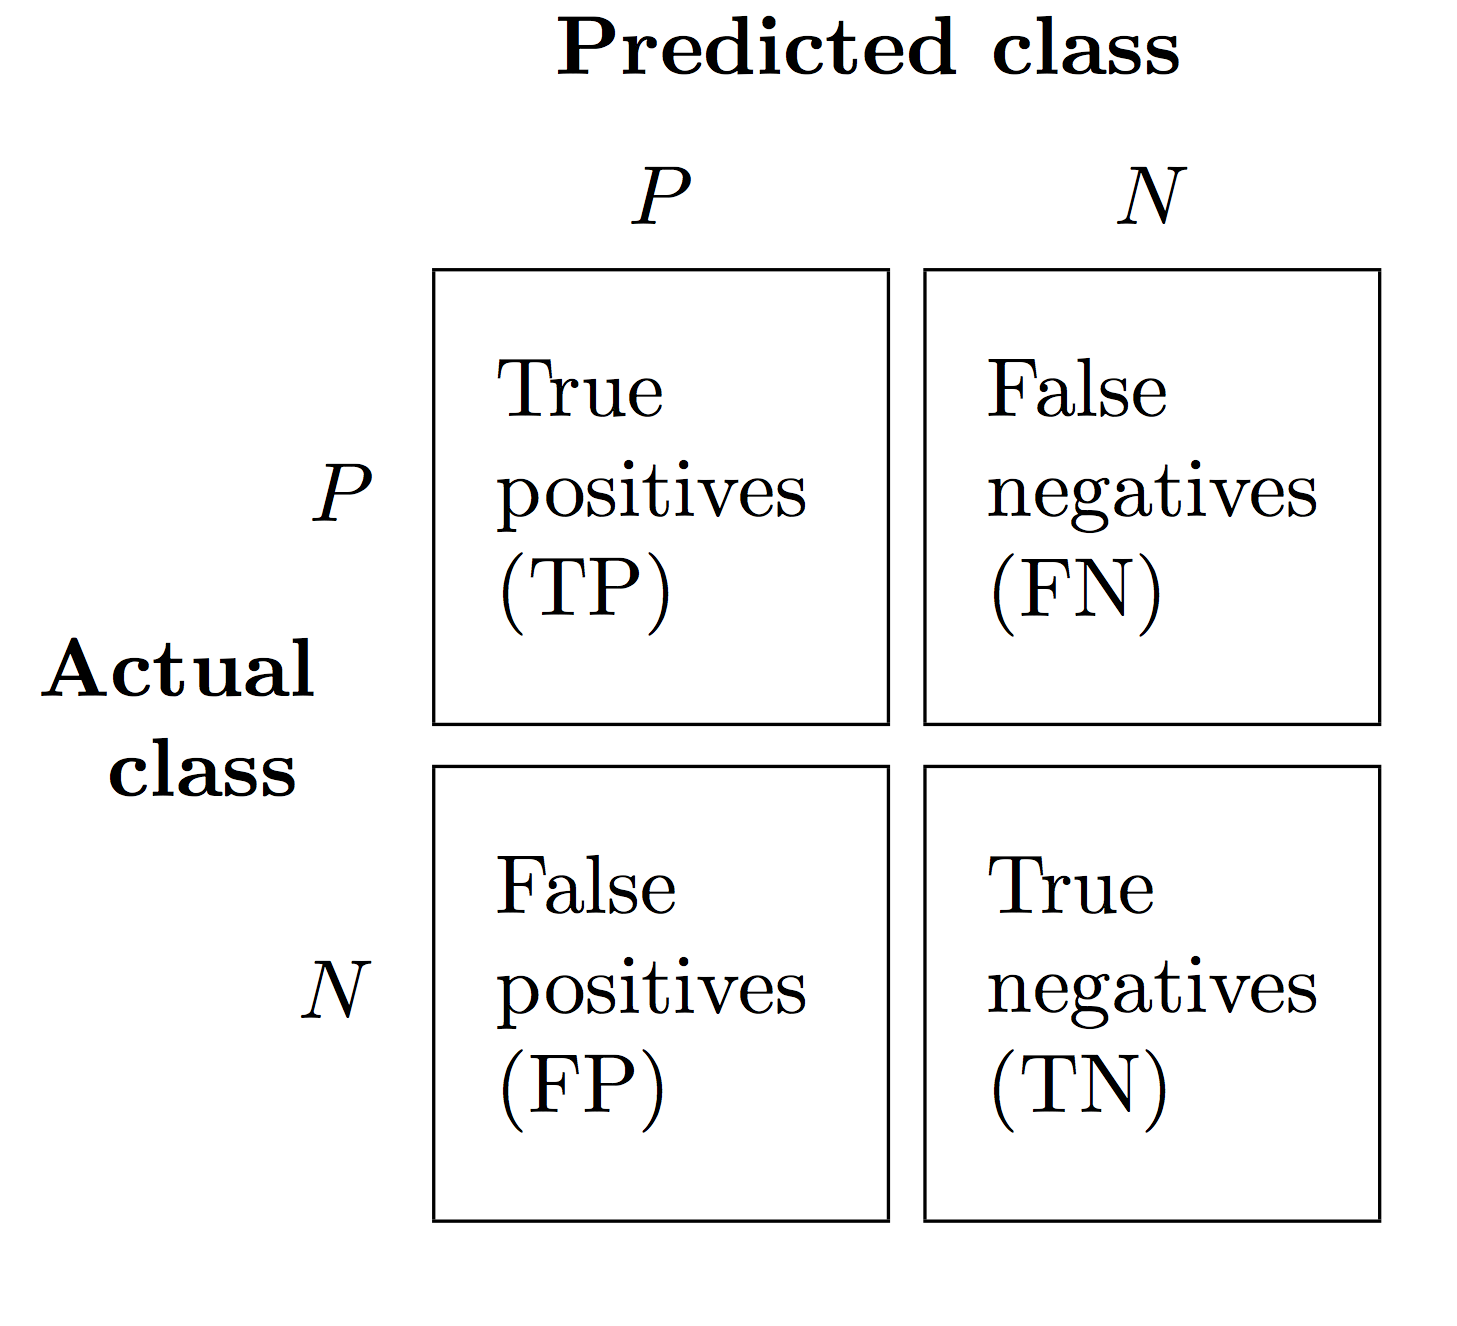

In [16]:
Image(filename='images/06_08.png', width=300) 

In [17]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_lr_test, labels=[1, 0])
print(confmat)

[[41  1]
 [ 1 71]]


We conclude:

Assuming that class 1 (malignant) is the positive class in this example, our model correctly classified 71 of the samples that belong to class 0 (true negatives) and 41 samples that belong to class 1 (true positives), respectively. However, our model also incorrectly misclassified 1 sample from class 0 as class 1 (false positive), and it predicted that 2 samples are benign although it is a malignant tumor (false negatives).

## Other metrics for a classification model

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_lr_test))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred_lr_test))

y_proba = best_lr.predict_proba(X_test)[:, 1]
print('AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba))

Precision: 0.976
Recall: 0.976
F1: 0.976
AUC Score: 0.997


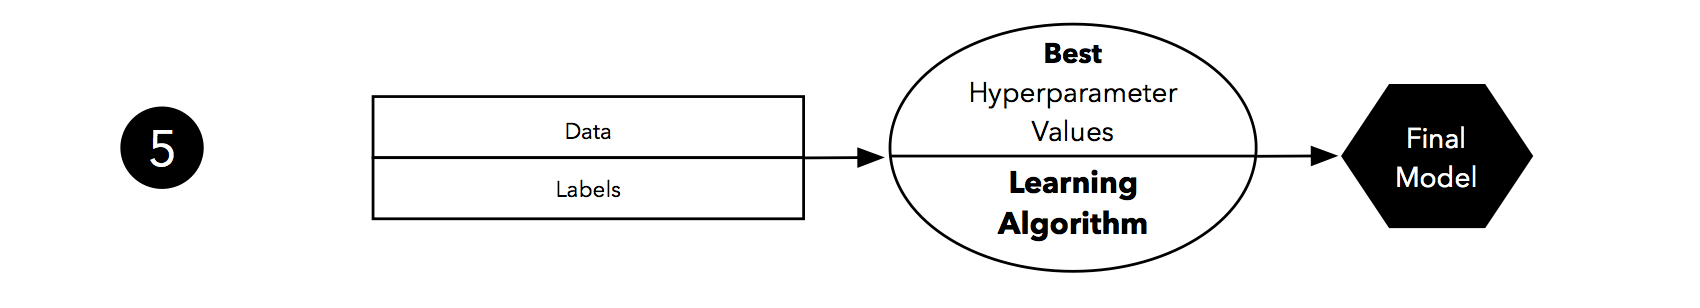

In [19]:
Image(filename='images/ms_5.png', width=1000) 

In [20]:
final_model = best_lr.fit(X, y)
print(final_model)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
